##### Version 0.01 -- Travanj 2017

# Method of images

Do sada smo mogli kreirati osnovna rješenja potencijalnog toka koja mogu rezultirati strujanjem oko objekata, npr. oko Rankine-ovog ovala ili cilindra.

Sad ćemo probati dobiti sliku strujanja oko ravog zida.

*Method of images*: postaviti singularitet blizu "zida" dodavanjem zrcalne slike singulariteta s druge strane zida. 
Takva tehnika se još naziva i *aerodynamic interferences*. 

Što se tiče Python programskog jezika, uvest ćemo **klase** u naše skripte. Ovo ne znači da je to jedini način kojim se može implementirati ova metoda, već predstavlja samo jedan pristup apstrakcije modeliranog problema.

Kao i do sada, počinjemo s već poznatim *import* linijama idefiniranjem domene.

In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

## Izvor blizu zida i još ponešto

Ako postavimo izvor blizu zida, zid bi trebao prilično promijeniti strujanje. Postavimo izvor na $y=y_\text{source}$ pored zida koji je na $y=0$. Rubni uvjet na zidu pretpostavlja tangencijalno strujanje - $v=0$ za horizontalni zid. Efekt zida na izvor je ekvivalentan ako postavimo novi izvor jednake snage (zrcalna slika, ili *image*) na $y=-y_\text{source}$.

Ovdje ćemo probati prestati kopirati kod i pokušati kreirati **klase**.

---

__Ovo nije službena definicija klase!__

Klasa je skup podataka i funkcija koje djeluju na tim podacima. Time je moguće kod održavati urednijim i čitljivijim za druge programere. Pametnim dizajnom klase je lakše održavanje, modificiranje i proširivanje funkcionalnosti. Ono što je teško jest *pametno dizajnirati* klasu, a to dolazi s iskustvom. Možda. 

---

Definirajmo klasu `Source` koja će sadržavati sve informacije koje su relevantne za izvor. On je definiran svojim intenzitetom i svojom pozicijom u domeni. Dakle, definirat ćemo našu klasu `Source` s tri `attributes`:

* `strength`: intenzitet izvora.
* `x`: $x$ koordinata pozicije izvora.
* `y`: $y$ koordinata pozicije izvora.

Što želimo od izvora? Izračunati polje brzina i *stream function*. Daklem moramo implementirati dvije metode (funkcije): izračun brzina(iznenađujuće, ali tu funkciju ćemo nazvati `velocity`) i izračun *stream function* (`stream_function`).

Malo detaljnije o funkcijama:

* funkcija `velocity`: funkcija koja izračunava komponente brzine izvora na mreži (`X`,`Y`). Odnosno, metoda će imati dv argumenta, `X` i `Y` i kreirati dva nova atributa: `u` i `v`.
* funkcija `stream_function`: funkcija koja izračunava *stream function* izvora na mreži (`X`,`Y`). Kao i prije, metoda će imati dva argumenta, `X` i `Y` i generirati novi atribut izvora: `psi`.

Dodatno, svaka klasa mora imati *konstruktor*, koja inicijalizira podatke. Ona se uvije naziva `__init__`:

In [3]:
class Source:
    """
    Contains information related to a source (or sink).
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the singularity.
        x: float
            x-coordinate of the singularity.
        y: float
            y-coordinate of the singularity.
        """
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

Što je `self`? Kad god pozivamo klasu `Source`, izgledat će kao poziv funkcije. Npr.: `source = Source(1, 0, 0)`, kojim kreiramo izvor intenziteta 1 u ishodištu. Python automatski poziva *konstruktor* s parametrima `(self, 1, 0, 0)`, tj. Python dodaje `self` u listu parametara, što bi u prijevodu otprilike značilo "bit će kreiran izvor sa sljedećim parametrima".

Jednom kad je kreiran `source`, možemo pozvati dvije metode (izračun brzina i *stream function*) na mreži (`X`,`Y`). Pripadnost tih funkcija klasi označavamo s točkom.

Komponente brzine u kartezijevim koordinatama su:

$$u = \frac{\sigma}{2\pi}\frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

$$v = \frac{\sigma}{2\pi}\frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2},$$

a *stream function*:

$$\psi = \frac{\sigma}{2\pi}\arctan\left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

Kako to izgleda?

In [4]:
strength_source = 1.0                  # strength of the source         
x_source, y_source = 0.0, 0.5          # location of the source

# create a source (object of class Source) 
source = Source(strength_source, x_source, y_source)

# compute the velocity field and the stream-function on the mesh grid
source.velocity(X, Y)
source.stream_function(X, Y)

Primijetite točku iza `source` varijable? Time želimo reći: "izvrši funkciju `velocity` objekta `source`." Ta funkcija je pridružema podacima tog izvora, jer je dio klase.

Kreirat ćemo i zrcalnu sliku izvora koristeći postojeću klasu `Source` s istim intenzitetom ali s različitom pozicijom. Već sad se može vidjeti razlog zašto smo izvor pretvorili u klasu. Možda.

In [5]:
# create the image of the source and computes velocity and stream-function
source_image = Source(strength_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

Možemo izračunati strujnice u blizini zida koristeći superpoziciju, što dovodi do novog polja brzina:

$$u = \frac{\sigma}{2\pi} \left( \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2} + \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y+y_\text{source}\right)^2} \right)$$

$$v = \frac{\sigma}{2\pi} \left( \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2} + \frac{y+y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y+y_\text{source}\right)^2} \right)$$

i nove *stream function*:

$$\psi = \frac{\sigma}{2\pi} \left( \arctan\left(\frac{y-y_\text{source}}{x-x_\text{source}}\right) + \arctan\left(\frac{y+y_\text{source}}{x-x_\text{source}}\right) \right)$$

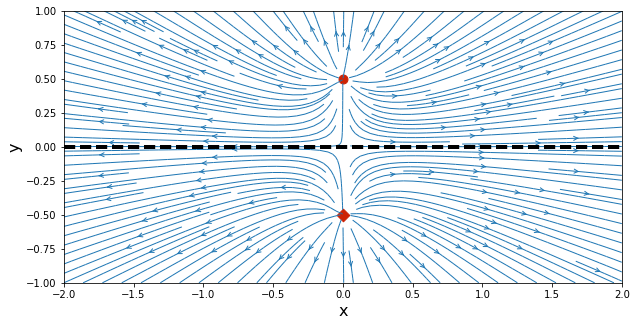

In [6]:
# superposition of the source and its image
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Vrtlog blizu zida

Slično, kreirat ćemo klasu `Vortex`, a zahtijevat ćemo intenzitet i poziciju. Klasa će imati dvije metode: izračun komponenti brzina i *stream function*.

Također, potreban nam je *konstruktor*, `__init__`, kojim inicijaliziramo atribute vrtloga:

In [7]:
class Vortex:
    """
    Contains information related to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.
        
        Parameters
        ----------
        strength: float
            Strength of the vortex.
        x: float
            x-coordinate of the vortex.
        y: float
            y-coordinate of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = +self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v = -self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(4*math.pi)*numpy.log((X-self.x)**2+(Y-self.y)**2)

Sada je lako kreirati dva objekta tipa `Vortex` za novi vrtlog i njegovu zrcalnu sliku.

In [8]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# create a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

# create the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

Superpozicija na djelu:

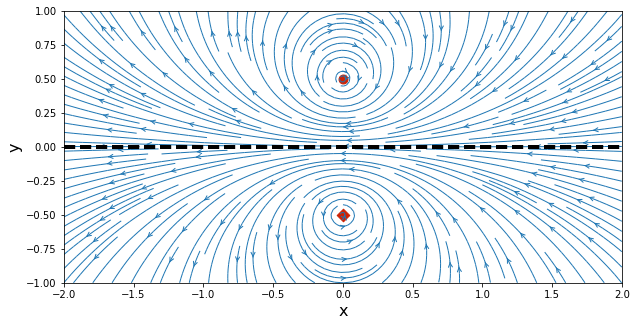

In [9]:
# superposition of the vortex and its image
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Više vrtloga blizu zida

Dodajmo još singulariteta blizu zida...

In [10]:
strength_vortex = 1.0                  # absolute value of each vortex strength
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

# create two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# compute the velocity and stream-function for each vortex
vortex1.velocity(X, Y)
vortex1.stream_function(X, Y)
vortex2.velocity(X, Y)
vortex2.stream_function(X, Y)

# create an image for each vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

# compute the velcoity and stream-function of each image
vortex1_image.velocity(X, Y)
vortex1_image.stream_function(X, Y)
vortex2_image.velocity(X, Y)
vortex2_image.stream_function(X, Y)

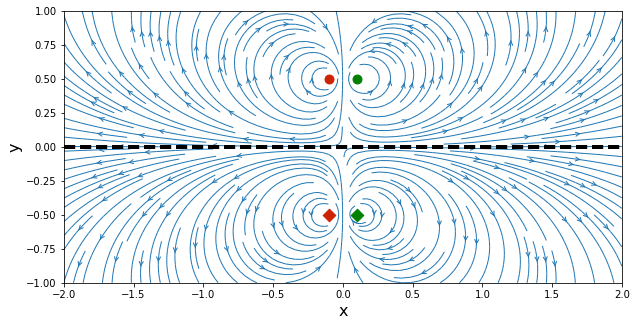

In [11]:
# superposition of the vortex pair and its image
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

## Doublet blizu zida paralelnim s uniformnim tokom

Zadnji tip strujanja - doublet uz zid. Kreiramo novu klasu `Doublet`, kao i gore.

In [12]:
u_inf = 1.0    # free-stream speed

# calculate the velocity and stream-function of the free-stream flow
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [13]:
class Doublet:
    """
    Contains information related to a doublet.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the doublet.
        
        Parameters
        ----------
        strength: float
            Strength of the doublet.
        x: float
            x-coordinate of the doublet.
        y: float
            y-coordinate of the doublet.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = -self.strength/(2*math.pi)*\
                ((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+(Y-self.y)**2)**2
        self.v = -self.strength/(2*math.pi)*\
                2*(X-self.x)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)**2
            
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

In [14]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

# create a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# compute the velocity and stream-function of the doublet on the mesh
doublet.velocity(X, Y)
doublet.stream_function(X, Y)

# create the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# compute the velocity and stream-function of the image on the mesh
doublet_image.velocity(X, Y)
doublet_image.stream_function(X, Y)

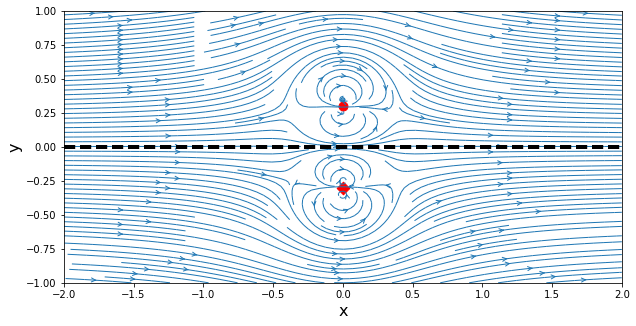

In [15]:
# superposition of the doublet and its image to the uniform flow
u = u_freestream + doublet.u + doublet_image.u
v = v_freestream + doublet.v + doublet_image.v
psi = psi_freestream + doublet.psi + doublet_image.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

---

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()